In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style("darkgrid")
sns.set_context(context="paper")

In [3]:
output_dir = Path("../figures/")
output_dir.mkdir(exist_ok=True, parents=True)

## Load data

In [4]:
overview_df = pd.read_csv("../data/frvt_11_overview.csv", index_col=0)
fmr_df = pd.read_csv("../data/frvt_11_gender_race.csv", index_col=0)

In [5]:
overview_df.head()

,"VisaMC, 1e-4","VisaMC, rank","Visa, 1e-6","Visa, rank","Mugshot, 1e-5","Mugshot, rank","Mugshot12+Yrs, 1e-5","Mugshot12+Yrs, rank","VisaBorder, 1e-6","VisaBorder, rank","Border, 1e-6","Border1e-6, rank","Border, 1e-5","Border1e-5, rank","Wild, 1e-4","Wild, rank","ChildExp, 1e-2","ChildExp, rank"
Name,,,,,,,,,,,,,,,,,,
3divi-004,0.0095,86.0,0.0153,88.0,0.0097,99.0,0.0145,96.0,0.0175,98.0,0.0330,86.0,0.0242,113.0,0.0665,167.0,0.5025,23.0
3divi-005,0.0094,85.0,0.0151,86.0,0.0078,73.0,0.0121,70.0,0.0135,71.0,0.0231,61.0,0.0156,74.0,0.0351,118.0,NaN,NaN
acer-000,0.1393,208.0,0.9075,238.0,0.9981,238.0,NaN,NaN,1.0000,232.0,1.0000,224.0,0.9998,228.0,0.9841,233.0,NaN,NaN
acer-001,0.0294,175.0,0.0504,175.0,0.0240,171.0,0.0463,172.0,0.0436,167.0,0.0622,123.0,0.0360,141.0,0.0307,84.0,NaN,NaN
acisw-003,0.9682,244.0,0.9971,244.0,0.7892,233.0,0.8738,231.0,0.8752,225.0,0.8275,203.0,0.6698,216.0,0.4470,222.0,NaN,NaN


In [6]:
fmr_df.head()

,MW_MB,MW_MW,MB_MB,MB_MW,FW_FB,FW_FW,FB_FB,FB_FW
acisw-003,0.0001,0.001,0.0005,0.0001,0.0002,0.0044,0.0014,0.0003
bresee-000,0.0007,0.001,0.0009,0.0007,0.0011,0.0018,0.0017,0.0010
intellifusion-002,0.0003,0.001,0.0015,0.0003,0.0006,0.0016,0.0020,0.0007
shaman-000,0.0011,0.001,0.0018,0.0011,0.0015,0.0015,0.0023,0.0015
yitu-003,0.0001,0.001,0.0013,0.0001,0.0002,0.0021,0.0024,0.0002


In [7]:
df = pd.concat([overview_df, fmr_df], axis="columns")

In [8]:
len(df)

250

## Plot FMR vs overall FNMR

In [9]:
def plot_scatter(
    df, xcol, ycol, xlabel, ylabel, filepath
):
    plt.figure(figsize=(4, 2.6))
    sns.scatterplot(x=xcol, y=ycol, data=df)
    plt.xscale("log")
    plt.yscale("log")
    plt.xticks(np.concatenate([
        np.arange(1e-3, 1e-2, 2e-3),
        np.arange(1e-2, 1e-1, 2e-2),
        np.arange(1e-1, 1e-0, 2e-1),
        [1e-0]
    ]))
    plt.yticks(np.concatenate([
        np.arange(1e-4, 1e-3, 2e-4),
        np.arange(1e-3, 1e-2, 2e-3),
        np.arange(1e-2, 1e-1, 2e-2),
        np.arange(1e-1, 1e-0, 2e-1),
        [1e-0]
    ]))
    plt.plot([1e-3, 1.2], [1e-3, 1e-3])
    plt.xlim([1e-3, 1.2])
    plt.ylim([1e-4, 1e-1])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.savefig(filepath, dpi=300)

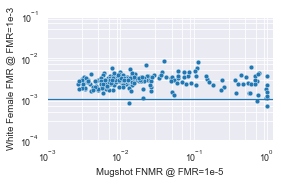

In [10]:
plot_scatter(
    df=df, 
    xcol="Mugshot, 1e-5", 
    ycol="FW_FW", 
    xlabel="Mugshot FNMR @ FMR=1e-5",
    ylabel="White Female FMR @ FMR=1e-3",
    filepath=output_dir / "frvt_11_gender_race_fw.png",
)

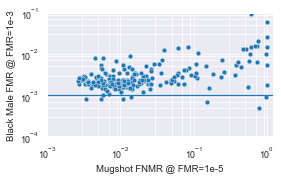

In [11]:
plot_scatter(
    df=df, 
    xcol="Mugshot, 1e-5", 
    ycol="MB_MB", 
    xlabel="Mugshot FNMR @ FMR=1e-5",
    ylabel="Black Male FMR @ FMR=1e-3",
    filepath=output_dir / "frvt_11_gender_race_mb.png",
)

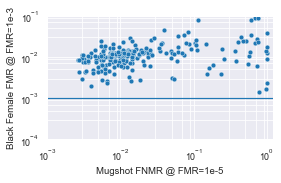

In [12]:
plot_scatter(
    df=df, 
    xcol="Mugshot, 1e-5", 
    ycol="FB_FB", 
    xlabel="Mugshot FNMR @ FMR=1e-5",
    ylabel="Black Female FMR @ FMR=1e-3",
    filepath=output_dir / "frvt_11_gender_race_fb.png",
)

## Ordering of gender-race

In [13]:
overview_df = pd.read_csv("../data/frvt_11_overview.csv", index_col=0)

In [14]:
df = pd.read_csv("../data/frvt_11_gender_race.csv", index_col=0)
df = df.rename(
    columns={"MW_MW": "MW", "MB_MB": "MB", "FW_FW": "FW", "FB_FB":  "FB"}
)
df = df[["MW", "MB", "FW", "FB"]]

In [15]:
def get_ordering(row):
    ordered = row[["MW", "MB", "FW", "FB"]].sort_values().index
    return " < ".join(ordered)

In [16]:
df["order"] = df.apply(get_ordering, axis=1)

In [17]:
df["order"].value_counts()

MW < MB < FW < FB    150
MW < FW < MB < FB     72
MW < FW < FB < MB      7
MB < MW < FW < FB      5
MB < MW < FB < FW      2
FW < MW < FB < MB      2
FW < MW < MB < FB      1
MW < MB < FB < FW      1
Name: order, dtype: int64

In [18]:
df["order"].value_counts().sum()

240

In [19]:
counts = df["order"].value_counts()
tail_orderings = counts[counts < 10].index

In [20]:
tail_df = df[df["order"].isin(tail_orderings)].copy()
tail_df["order_counts"] = tail_df["order"].map(counts)
tail_df.sort_values(by="order_counts", ascending=False, inplace=True)

In [21]:
tail_df = tail_df.merge(
    right=overview_df[["Mugshot, 1e-5", "Mugshot, rank"]], 
    how="left", 
    left_index=True, 
    right_index=True,
)

In [22]:
tail_df

,MW,MB,FW,FB,order,order_counts,"Mugshot, 1e-5","Mugshot, rank"
intsysmsu-001,0.001,0.4985,0.0037,0.4175,MW < FW < FB < MB,7,0.9923,236.0
amplifiedgroup-001,0.001,0.1087,0.0036,0.0221,MW < FW < FB < MB,7,0.6973,228.0
videonetics-001,0.001,0.1433,0.0040,0.0903,MW < FW < FB < MB,7,0.7517,231.0
iws-000,0.001,0.1587,0.0029,0.0892,MW < FW < FB < MB,7,0.6859,226.0
videonetics-002,0.001,0.0922,0.0060,0.0789,MW < FW < FB < MB,7,0.6081,224.0
chosun-000,0.001,0.0148,0.0011,0.0091,MW < FW < FB < MB,7,1.0000,245.0
visteam-000,0.001,0.0597,0.0012,0.0384,MW < FW < FB < MB,7,0.9959,237.0
sjtu-002,0.001,0.0009,0.0016,0.0026,MB < MW < FW < FB,5,0.0138,137.0
cybercore-000,0.001,0.0007,0.0031,0.0039,MB < MW < FW < FB,5,0.1521,209.0
psl-003,0.001,0.0008,0.0023,0.0045,MB < MW < FW < FB,5,0.0055,35.0


In [23]:
(tail_df["Mugshot, 1e-5"] < 0.01).sum()

2

In [24]:
(tail_df["Mugshot, 1e-5"] < 0.02).sum()

6